In [1]:
#downloading libraries
import pandas as pd 
import numpy as np
import matplotlib as plt
import pandas as pd
import nltk
import re
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt
from collections import Counter
import pickle

#nltk.download()

In [3]:
data=pd.read_csv('reddit-india-data.csv')
data

,flair,title,score,id,url,comms_num,body,author,comments,timestamp
0,AMA,I'm a Malayalee ABCD. Ask Me Anything.,1,cz98so,https://www.reddit.com/r/india/comments/cz98so...,42,I'm a Malayalee ABCD (American-Born Confused D...,simsim1000,Did you ever faced racism? \n\nAnd how is gir...,2019-09-04 08:34:35
1,AMA,What are some of the memorable posts of r/India??,85,cfj0kx,https://www.reddit.com/r/india/comments/cfj0kx...,67,As title suggests. Some posts are legends in R...,xxyyccb,Can't find it but some guy's mother posted he...,2019-07-20 20:37:58
2,AMA,Requesting AMA by Residents of Jammu & Kashmir.,4,crofzs,https://www.reddit.com/r/india/comments/crofzs...,18,"If there is any Residents of Jammu & Kashmir, ...",namanjha29,"On here, the accounts claiming to be Kashmir ...",2019-08-18 06:06:03
3,AMA,"Friends, Indians, countrymen, I cleared UPSC C...",1859,ba1o59,https://www.reddit.com/r/india/comments/ba1o59...,404,I am also super happy as I got the rank which ...,pseudoliberandu,Congrats. My neighbour aunty wants to know ab...,2019-04-06 20:14:18
4,AMA,So this happened yesterday [R],609,bcz7em,https://imgur.com/DJXElBz,77,NaN,High24x7,the fact that they are acknowledging the prob...,2019-04-14 17:57:08
5,AMA,Congress social media head Divya Spandana dele...,78,bw5y0q,https://www.thehindu.com/news/national/congres...,16,NaN,harddisc,IIRC she was on reddit and didnt answer much....,2019-06-03 16:44:45
6,AMA,How magician like Karan Singh do such magics? ...,6,c92763,https://www.reddit.com/r/india/comments/c92763...,11,NaN,MrGogi61,Sleight of hand and practice. Would you like ...,2019-07-05 02:17:17
7,AMA,[Question] Has anyone here tried Paytm First?,5,cja9s9,https://www.reddit.com/r/india/comments/cja9s9...,1,I am thinking of buying Paytm First- does anyo...,shantanusri,Someone here did an AMA recently.,2019-07-30 01:28:04
8,AMA,AMA Request: A Kashmiri Pandit over 30 years old.,71,cnhzlf,https://www.reddit.com/r/india/comments/cnhzlf...,74,"Now that 370 and 35A have been abolished, a fe...",contraryview,I know one but he's 20. I'll try to contact h...,2019-08-08 20:23:43
9,AMA,I was searching for something and I stumbled u...,332,cd3xmx,https://i.imgur.com/FefhpHc.jpg,108,NaN,SPYDER94,"Such a secular paper. Sorry, 10/10 or no AMA ...",2019-07-15 04:29:40


In [22]:
def date_getter(data,f,to_get):
    flair_data=[]
    for i in range(len(data)):
        if data['flair'][i] ==f:
            flair_data.append(data[to_get][i])
    return(flair_data)

Text(0.5, 1.0, 'Photography')

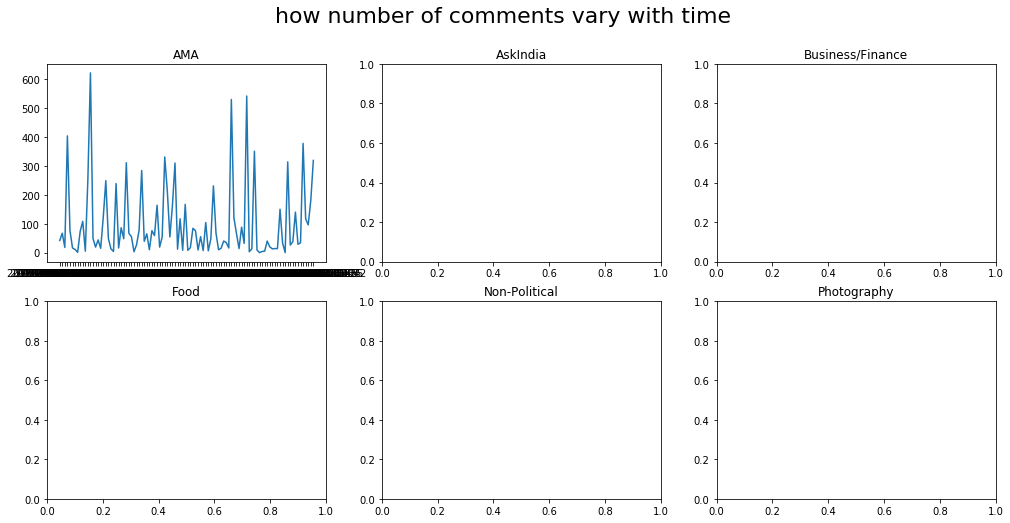

In [18]:
fig1=plt.figure(figsize=(17,8))
fig1.suptitle('how number of comments vary with time ', fontsize =22)
p1=fig1.add_subplot(231)
p1.set_title('AMA')
p1.plot(date,comm_num)

p2=fig1.add_subplot(232)
p2.set_title('AskIndia')

p3=fig1.add_subplot(233)
p3.set_title('Business/Finance')

p4=fig1.add_subplot(234)
p4.set_title('Food')

p5=fig1.add_subplot(235)
p5.set_title('Non-Political')

p6=fig1.add_subplot(236)
p6.set_title('Photography')


Text(0.5, 1.0, 'Reddiquette')

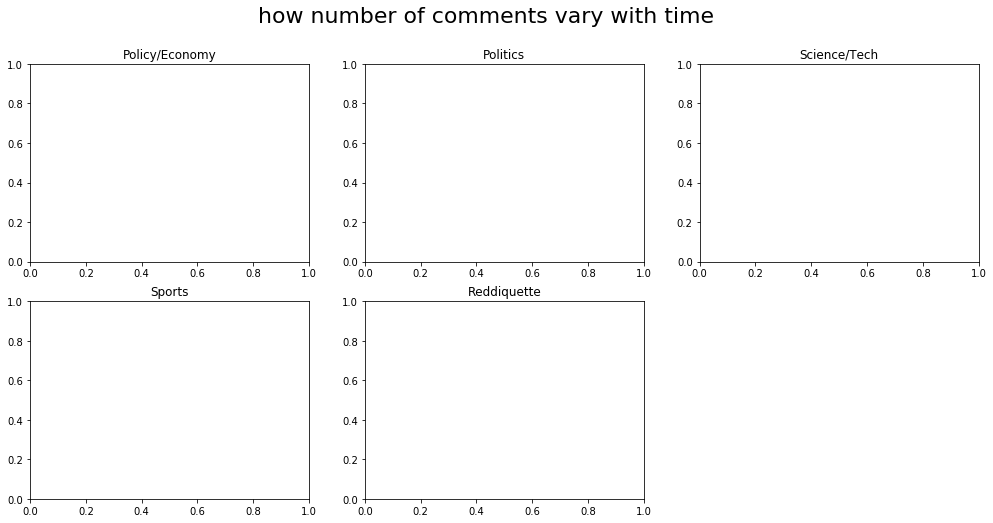

In [11]:
fig2=plt.figure(figsize=(17,8))
fig2.suptitle('how number of comments vary with time ', fontsize =22)

p7=fig2.add_subplot(231)
p7.set_title('Policy/Economy')

p8=fig2.add_subplot(232)
p8.set_title('Politics')

p9=fig2.add_subplot(233)
p9.set_title('Science/Tech')

p10=fig2.add_subplot(234)
p10.set_title('Sports')

p11=fig2.add_subplot(235)
p11.set_title('Reddiquette')

(array([57., 20.,  6.,  3.,  4.,  5.,  2.,  0.,  2.,  1.]),
 array([  0. ,  62.2, 124.4, 186.6, 248.8, 311. , 373.2, 435.4, 497.6,
        559.8, 622. ]),
 <a list of 10 Patch objects>)

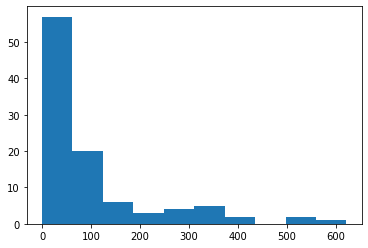

In [20]:
plt.hist(comm_num)

In [ ]:
flair_list=['AMA','AskIndia','Business/Finance','Food','Non-Political','Photography','Policy/Economy','Politics','Science/Technology','Sports','[R]eddiquette']
